# Atividade Prática 5

## Convolução circular e convolução linear

### Entrega: até 22/10/2021 às 23:59 no e-disciplinas

#### Nome: Ciro B Rosa  N° USP: 2320769  ( ) Grad (X) Pós

###  Revisão: convolução circular

Vimos na seção 4.2 que o resultado da convolução circular entre dois sinais $x,h\in\mathbb{C}^N$ é o sinal $y=x*h\in\mathbb{C}^N$ definido pela equação

$$y_n = \sum_{m=0}^{N-1}h_mx_{n-m},\quad n=0,\ldots,N-1. \quad \mbox{(Equação I)}$$

Essa equação pressupõe que os sinais finitos $x$ e $h$ são estendidos de forma *periódica*, ou seja, o termo $x_{n-m}\ $ é computado como $x_{(n-m)\%N}\ $ .

Em particular, ambos $x$ e $h$ são reinterpretados como sinais de tempo bi-infinito ($n\in\mathbb{Z}$) onde

$$x_{n+kN} = x_n,\quad h_{n+kN} = h_n,\quad\forall n\in\{0,1,\ldots,N-1\},\ \forall k\in\mathbb{Z},$$

sendo que o resultado $y$, consequentemente, também é bi-infinito e periódico, ou seja,

$$y_{n+kN} = y_n,\ \forall n,k.$$

Em particular, o somatório da Equação I poderia ser computado sobre qualquer faixa de índices de tamanho N (tomando-se $h_mx_{n-m}=h_{m\% N}\ x_{(n-m)\% N}\ $).

In [1]:
# importa dependências da tarefa
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

**Exercício 1:**

**(a)** Escreva uma função <tt>convolução_circular(x,h)</tt> que compute a Equação I a partir de vetores $x,h\in\mathbb{C}^N$, devolvendo o vetor $y\in\mathbb{C}^N$.

In [2]:
# Exercício 1(a)

def convolução_circular(x,h):
    y = np.zeros(len(x))

    for n in range(len(y)):
        for m in range(len(x)):
            y[n] += h[m] * x[n-m]
    return(y)


#### Exemplo: filtro da média centralizada de $L=2M+1$ amostras

Considere o filtro dado pela equação

$$y_n = \frac{1}{L}\big(\overbrace{x_{n-M}+\cdots+x_n+\cdots+x_{n+M}}^{L=2M+1\ \mbox{termos}}\big). \quad \mbox{(Equação II)}$$

Esse filtro pode ser reinterpretado como uma convolução circular $y=x*h$, onde $h_n=\frac{1}{L}$, se $-M\le n\le +M$, e $h_n=0$, caso contrário, ou seja,

$$h=\big(\overbrace{\frac{1}{L},\frac{1}{L},\ldots,\frac{1}{L}}^{M+1 \mbox{vezes}},0,\ldots,0,\overbrace{\frac{1}{L},\frac{1}{L},\ldots,\frac{1}{L}}^{M \mbox{vezes}}\big)$$

(convença-se disso, lembrando que $h_{N-j}=h_{-j}\ $).

**Exercício 1:**

**(b)** Teste sua função usando um sinal $x\in\mathbb{C}^{N}$ com $N=1000$ definido por

$$x_n = \sin(2\pi n/N)+\frac{1}{\sqrt{5}}\sin(2\pi 5 n/N)+\frac{1}{\sqrt{50}}\sin(2\pi 50 n/N)$$

e usando um vetor $h$ associado ao filtro da média de $L=31$ amostras (Equação II com $M=15$). Plote em um mesmo gráfico o sinal original $x$ e o sinal filtrado $y=x*h$. Use o código fornecido ao final para reconfirmar o resultado da sua implementação.

In [3]:
# Exercício 1(b)

N = 1000
L = 31; M = 15

x = np.zeros(N)
ns = np.arange(N)

for n in ns:
    x[n] = np.sin(2*math.pi * n/N) + (1/math.sqrt(5)) * \
    np.sin(2*math.pi * 5 * n/N) + (1/math.sqrt(50))   * \
    np.sin(2*math.pi * 50 * n/N)
    
h = np.zeros(N)
h[0] = 1 / L
for m in range(1, M + 1):
    h[m] = 1 / L
    h[-m] = 1 / L

y = convolução_circular(x,h)

# a implementação a seguir computa o mesmo resultado de outra forma (spoiler: esse é o teorema 4.2)
y_alt = np.real(np.fft.ifft(np.fft.fft(x)*np.fft.fft(h)))
assert np.linalg.norm(y-y_alt)<1e-8
print("resultado correto!")

resultado correto!


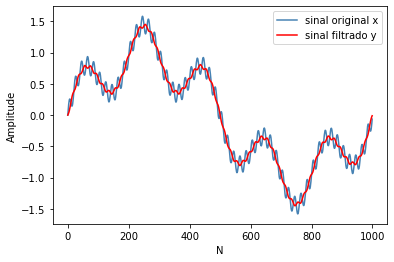

In [4]:
plt.plot(ns, x, color = "steelblue", label = "sinal original x")
plt.plot(ns, y, color = "red",       label = "sinal filtrado y")
plt.legend()
plt.xlabel("N")
plt.ylabel("Amplitude")
plt.show()

###  Convolução linear

A *convolução linear* parte da premissa de que a extensão de *sinais de duração finita* para fora de seu intervalo de indexação usual segue a regra do *completamento por zeros*: novamente todos os sinais são reinterpretados como de tempo bi-infinito, porém

$$x_n = 0,\ \forall n\not\in I(x),$$

onde $I(x)$ é o conjunto finito dos índices onde $x$ estava originalmente definido; a mesma extensão é aplicada a $h$, ou seja, $h_n = 0,\ \forall n\not\in I(h)$.

Com essa extensão, a convolução linear $x\overline*h$ é definida como o sinal $y$ tal que

$$\begin{array}{llr}
y_n = \displaystyle\sum_{m=-\infty}^{\infty}h_mx_{n-m} &= \displaystyle\sum_{m\in I(h)}h_mx_{n-m}&\forall n\in\mathbb{Z},\\
&= \displaystyle\sum_{n-m\in I(x)}h_mx_{n-m},&\mbox{(Equação III)}
\end{array}$$

onde a soma acima é sempre finita, uma vez que tanto $x$ quanto $h$ só podem ser $\neq 0$ nos intervalos finitos $I(x)$ e $I(h)$, respectivamente.

Apesar de $y_n$ também estar definido $\forall n\in\mathbb{Z}$, computacionalmente estamos interessados apenas na faixa de índices onde a equação de convolução inclui *algum* índice em $I(h)$ e $I(x)$, de tal forma que para todos os efeitos práticos $y$ também pode ser considerado como um sinal de duração finita.

Essa definição traz uma grande flexibilidade no tratamento de sinais, pois permite a convolução de sinais de durações diferentes, bem como definidos em intervalos de índices arbitrários (não necessariamente $0,1,\ldots,N-1$). Isso é especialmente conveniente no processamento de sinais $x$ de comprimento muito grande (ou desconhecido a priori, como no processamento em tempo-real) por filtros de convolução que possuem poucos coeficientes não-nulos, onde a formulação com o somatório sobre $m\in I(h)$ corresponde à implementação mais eficiente.

#### Tamanho resultante da convolução linear

Se $x$ tem tamanho $N$, a convolução linear $y=x\overline*h$ geralmente terá um trecho não-nulo de comprimento *maior* do que $N$, dependendo de quantos coeficientes o filtro possui. Não é difícil ver que se $x$ é um vetor de tamanho $N$ e $h$ é um vetor de tamanho $L$, então a parte não-nula de $y$ terá no máximo tamanho $N+L-1$:

$$\begin{array}{l}
\hspace{1.7cm}\overbrace{\square\square\square\square\square\square\square\square\cdots\square\square\square\square\square\square\square\square\square\square\square\square\square\square\square\square}^{x}\\
\hspace{1.75cm}\vdots\hspace{6.7cm}\vdots\\
\underbrace{\square\square\square\square\square\square\square}_{h}\hspace{6.7cm}\underbrace{\square\square\square\square\square\square\square}_{h}
\end{array}$$

(obs: nesse diagrama os coeficientes de $h$ estariam espelhados!)

Para saber os índices onde $y_n$ poderia ser não-nulo, basta impor no somatório da Equação III as condições $\min I(h)\le m\le\max I(h)$ e $\min I(x)\le n-m\le \max I(x)$, cuja solução é

$$\min I(x)-\max I(h)\le n\le \max I(x)-\min I(h).$$

Em particular, no caso dos vetores $x$ e $h$ seguirem uma indexação usual, ou seja, $I(x)=\{0,1,\ldots,N-1\}$ e $I(h)=\{0,1,\ldots,L-1\}$, teremos $y_n$ possivelmente não-nulo no intervalo

$$-L+1\le n\le N-1.$$

**Exercício 2:** 

**(a)** Escreva uma função <tt>convolução_linear(x,h)</tt> que devolve um vetor $y$ de comprimento <tt>len(x)+len(h)-1</tt> correspondendo à convolução linear entre $x=(x_0,\ldots,x_{N-1})$ e $h=(h_0,h_{1},\ldots,h_{L-1})$. Você deve implementar a convolução linear diretamente a partir da definição (Equação III), considerando $I(x)=I(h)=\{0,1,\ldots,N-1\}$.

**Dica:** *você pode acrescentar zeros (sentinelas) à esquerda e à direita do vetor $x$ para facilitar (muito) a implementação. O vetor y devolvido, de comprimento <tt>len(x)+len(h)-1</tt>, corresponderá aos valores $y_{-L+1}\ ,\ldots,y_{N-1}\ $, ou seja, aos índices $n=-L+1,\ldots,N-1$ na Equação III.*

In [5]:
# Exercício 2(a)

def convolucao_linear(x,h):
    N = len(x)
    L = len(h)
    y = np.zeros(N + L)
    
    xExtended = np.concatenate((np.zeros(L), x, np.zeros(L)))
    
    for n in range(len(y)):
        for m in range(L):
            y[n] += h[m] * xExtended[n + m]
    
    y = y[1:]
    return(y)


#### Exemplo: filtro da média centralizada de L amostras

O mesmo filtro definido anteriormente pela Equação II:

$$y_n = \frac{1}{L}\big(x_{n-M}+\cdots+x_n+\cdots+x_{n+M}\big)\quad\mbox{(Equação II)}$$

pode ser reinterpretado no contexto da convolução linear como $y=x\overline*h$ onde $x$ é um sinal finito de duração $N$ arbitrária e $h_n=\frac{1}{L}$ se $-M\le n\le +M$ (com $h_n=0$ caso contrário), ou seja, a extensão de $h$ como sinal bi-infinito é

$$h=\big(\ldots,0,0,0,\underbrace{\overbrace{\frac{1}{L}}^{h_{-M}},\ldots,\overbrace{\frac{1}{L}}^{h_{\,0}},\ldots,\overbrace{\frac{1}{L}}^{h_{M}}}_{L\ \mbox{vezes}},0,0,\ldots\big).$$

Nesse contexto, a Equação II é aplicada substituindo-se $x_{n-m}=0$ sempre que $n-m<0$ ou $n-m\ge N$.

A saída $y$ desse filtro tem $N+L-1=N+2M$ coeficientes não-nulos, que correspondem ao intervalo de índices $n=-M,\ldots,0,1,\ldots,N+M-1$, considerando que $I(x)=\{0,1,\ldots,N-1\}$: basta ver que quando $n=-M$ a Equação II terá apenas o último termo $x_0$, e quando $n=N+M-1$ a mesma equação terá apenas o primeiro termo $x_{N-1}$.

**Exercício 2:**

**(b)** Use sua função <tt>convolucao_linear(x,h)</tt> para aplicar o filtro da média de $L=31$ amostras ao sinal do item 1(b), usando um vetor $h=(\frac{1}{L},\ldots,\frac{1}{L})$, e plote o sinal original e o sinal filtrado em um mesmo gráfico. Use o trecho de código fornecido para comparar sua implementação com uma implementação de referência. Comente na célula abaixo do código: seus gráficos estão alinhados no tempo? como você explica sua observação? caberia alguma correção de índices no resultado?

In [6]:
# Exercício 2(b)

h = np.zeros(L)
for i in range(L):
    h[i] = 1 / L

y = convolucao_linear(x, h)

# comparação com a implementação de referência:
y_alt = np.convolve(x,h)
assert (np.linalg.norm(y-y_alt)<1e-8)
print("resultado correto!")

resultado correto!


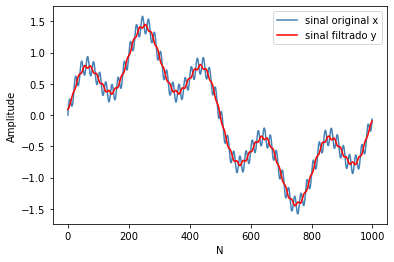

In [7]:
plt.plot(ns, x,       color = "steelblue", label = "sinal original x")
plt.plot(ns, y[M:-M], color = "red",       label = "sinal filtrado y")
plt.legend()
plt.xlabel("N")
plt.ylabel("Amplitude")
plt.show()

#### comentários sobre o exercício 2(b):

Conforme demonstrado, os vetores filtrados y e y_alt resultaram em um tamanho de 1030 elementos, maiores, portanto, que o tamanho do vetor x de entrada (1000 pontos) em exatos 2 * M = 30 pontos. Este fato foi usado para plotar os vetores x e y simultaneamente: o vetor y teve subtraídos M = 15 pontos em cada uma de suas extremidades para que a plotagem pudesse funcionar corretamente.

Esta decisão pareceu ser a mais acertada já que, no início e no final da convolução, não há uma coincidência exata entre os índices dos vetores x e h. Neste caso, precisamente, os 15 primeiros e os 15 últimos pontos da convolução.

### Para ler depois de entregar: relações entre as convoluções linear e circular

No diagrama que ilustra a convolução através de uma janela deslizante

$$\begin{array}{l}
\hspace{2.5cm}\overbrace{\square\square\square\square\square\square\square\square\cdots\square\square\square\square\square\square\square\square\square\square\square\square\square\square\square\square}^{x}\\
\hspace{2.5cm}\vdots\hspace{6.7cm}\vdots\\
h=\square\square\square\square\square\square\square→\hspace{2.8cm}\cdots\hspace{2.7cm}\square\square\square\square\square\square\square
\end{array}$$

é fácil ver que a diferença entre a convolução circular e a convolução linear aparece apenas nas extremidades do vetor $x$, pois é ali que existem diferenças entre as extensões periódica e por zeros: na convolução circular, os primeiros valores da entrada ($x_0,x_1,\ldots$) são combinados com valores do fim do vetor ($x_{-1}=x_{N-1},x_{-2}=x_{N-2},\ldots$), ao passo que na convolução linear os valores "ausentes" são tratados como $x_{-1}=x_{-2}=\cdots=0$; uma observação semelhante se aplica quando a equação de convolução envolve valores $x_n$ após o final do vetor $x$ ($n\ge N$).

Por outro lado, quando os $L$ coeficientes $h_m$ do filtro multiplicam apenas valores $x_{n-m}$ "pertencentes" aos índices do vetor $x$ original (ou seja, associados aos índices em $I(x)$) na expressão $y_n=\displaystyle\sum h_mx_{n-m}$, o modo de extensão do vetor (periódica ou por zeros) não faz nenhuma diferença no resultado da fórmula.

Isso sugere duas observações:

- que a convolução circular $x*h$ poderia ser obtida através de uma convolução linear $x\overline*h$ através de uma "pequena" extensão periódica do vetor $x$, copiando um certo número de amostras do final do vetor como salvaguarda à esquerda ($x_{\tiny\mbox{FIM}}\ \,$), e um certo número de amostras do início do vetor como salvaguarda à direita ($x_{\tiny\mbox{INÍCIO}}\ \ \ $):

$$\begin{array}{l}
\hspace{0.8cm}\overbrace{\square\square\square\square\square\square}^{x_{{}_{\tiny\mbox{FIM}}}}\overbrace{\square\square\square\square\square\square\square\square\square\square\cdots\square\square\square\square\square\square\square\square\square\square\square\square\square\square}^{x}\overbrace{\square\square\square\square\square\square}^{x_{\tiny\mbox{INÍCIO}}}\\
\hspace{0.8cm}\vdots\hspace{10.1cm}\vdots\\
h=\square\square\square\square\square\square\square→\hspace{2.8cm}\cdots\hspace{2.7cm}\square\square\square\square\square\square\square
\end{array}$$

- que o resultado da convolução linear poderia ser obtido por uma convolução circular, desde o vetor $x$ fosse salvaguardado com um número "suficiente" de zeros à direita (que serão implicitamente repetidos à esquerda por periodicidade):

$$\begin{array}{l}
\hspace{0.8cm}\color{gray}{0000000}\overbrace{\square\square\square\square\square\square\square\square\ \cdots\ \square\square\square\square\square\square\square\square\square\square\square\square\square\square\square\square}^{x}\overbrace{0000000}^{0_{\tiny\mbox{FIM}}}\\
\hspace{0.8cm}\vdots\hspace{10.1cm}\vdots\\
h=\square\square\square\square\square\square\square→\hspace{2.8cm}\cdots\hspace{2.7cm}\square\square\square\square\square\square\square
\end{array}$$

Alguns detalhes importantes dessas implementações, deixados como exercício opcional, correspondem a definir exatamente os tamanhos dos vetores $x_{\tiny\mbox{FIM}}\ \,$, $x_{\tiny\mbox{INÍCIO}}\ \ \ $ e $0_{\tiny\mbox{FIM}}\ \ $, considerando por exemplo que $I(x)=\{0,1,\ldots,N-1\}$ e que $I(h)\subset\mathbb{Z}$ é um conjunto finito arbitrário.